# K-nearest neighbors

In [29]:
# Example of getting neighbors for an instance
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        #if dist != 0.0:
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Test distance function
dataset = np.array([[1,2,0],
                    [1,2.5,0],
                    [7,2,1]])

test = np.array([[2,2]])

#plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=50, cmap='viridis')
#plt.show()
#print("Target = ",dataset[0])

#Your implementation
def voting(df_nearest, y_train):
  pass

[1. 2. 0.]
[1.  2.5 0. ]


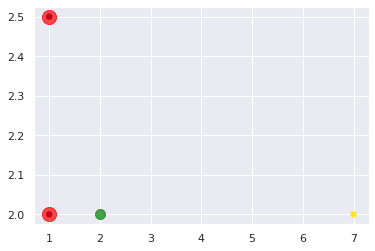

In [30]:
neighbors = np.array(get_neighbors(dataset, test, 2))
for neighbor in neighbors:
    print(neighbor)

plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
plt.scatter(neighbors[:, 0], neighbors[:, 1], c='red', s=200, alpha=0.7)
plt.scatter(test[0,0], test[0,1], c='green', s=100, alpha=0.7)
plt.show()

# SK-Learn

result =  (array([[0. , 0.5]]), array([[0, 1]]))


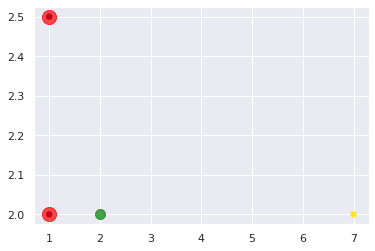

In [31]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(dataset[:, :2], dataset[:,2])

result = neigh.kneighbors(dataset[0,:2].reshape(1,2))
print("result = ",result) #distance and index

#Plot all points
plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
#Plot neighbors
plt.scatter(dataset[result[1][0:], 0], dataset[result[1][0:], 1], c='red', s=200, alpha=0.7)
#Plot target
plt.scatter(test[0,0], test[0,1], c='green', s=100, alpha=0.7)
plt.show()


KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(dataset[:, :2], dataset[:,2])
answer = knn.predict(test)
print(answer)

[0.]


# K-NN with real data

In [ ]:
from sklearn import datasets
data = datasets.load_iris()
print(data.DESCR)
print(data.target)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)
plt.scatter(x,data.data[:50,3],color='red') #petal width of Setosa
plt.scatter(x,data.data[50:100,3],color='blue') #petal width of Versicolour 
plt.scatter(x,data.data[100:,3],color='green') #petal width of Virginica

In [ ]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
answer = knn.predict(X_test)
print(classification_report(y_test, answer))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data.data[:,2:4])
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42,stratify=data.target)

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
print(knn_best.best_estimator_)
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))